<a href="https://colab.research.google.com/github/devarajma/Internship/blob/main/BestSeller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day - 1 : Understanding Dataset

In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/Internship/bestsellers_with_categories.csv'
df = pd.read_csv(file_path)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
print("----- Shape -----\n")
print(df.shape)
print("\n----- Info -----\n")
print(df.info())
print("\n----- Describe -----\n")
print(df.describe().T)

----- Shape -----

(550, 7)

----- Info -----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None

----- Describe -----

             count          mean           std     min     25%     50%  \
User Rating  550.0      4.618364      0.226980     3.3     4.5     4.7   
Reviews      550.0  11953.281818  11731.132017    37.0  4058.0  8580.0   
Price        550.0     13.100000     10.842262     0.0     7.0    11.0   
Year         550.0   2014.000000      3.165156  2009.0  2011.0  2014.0   

         

# DAY - 2 : Data Cleaning

In [ ]:
print(df.isnull().sum())
print('Number of Duplicate Record : ',df.duplicated().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Number of Duplicate Record :  0


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
df.to_csv("/content/drive/My Drive/Internship/cleaned_dataset.csv", index=False)

# Day 3: Exploratory Data Analysis (EDA)

---



### Top Rated Books

In [ ]:
df_top_rated=df.groupby(by='name')['user_rating'].mean().sort_values(ascending=False).reset_index()
df_top_rated.head()

,name,user_rating
0,Wrecking Ball (Diary of a Wimpy Kid Book 14),4.9
1,"Brown Bear, Brown Bear, What Do You See?",4.9
2,Dog Man: Lord of the Fleas: From the Creator o...,4.9
3,The Wonderful Things You Will Be,4.9
4,The Very Hungry Caterpillar,4.9


### Top Rated Author

In [ ]:
df_top_author=df.groupby(by='author')['user_rating'].mean().sort_values(ascending=False).reset_index()
df_top_author.head()


,author,user_rating
0,Alice Schertle,4.9
1,Bill Martin Jr.,4.9
2,Chip Gaines,4.9
3,Dav Pilkey,4.9
4,Emily Winfield Martin,4.9


### Top Reviewed Author

In [ ]:
df_top_authors=df.groupby(by='author')['reviews'].sum().sort_values(ascending=False).reset_index()
df_top_authors.head(5)

,author,reviews
0,Suzanne Collins,278329
1,John Green,210419
2,E L James,178011
3,Dr. Seuss,176545
4,Gillian Flynn,171813


### Average Price distribution among Genres

In [ ]:
df_genres_price=df.groupby(by='genre')['price'].mean().reset_index()
df_genres_price

,genre,price
0,Fiction,10.850000
1,Non Fiction,14.841935


### Top Reviewed Books

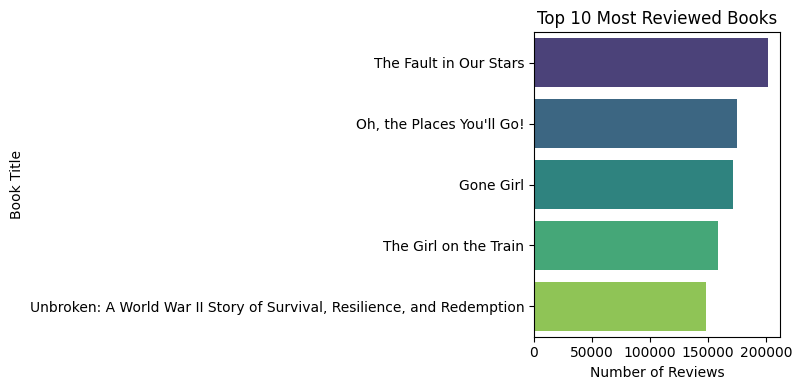

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


top_books = df.groupby(by='name')['reviews'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(8,4))
sns.barplot(data=top_books, x='reviews', y='name',hue='name' ,palette='viridis', legend=False)
plt.title('Top 10 Most Reviewed Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()



### Top Authors Among Genre

<ipython-input-22-575453522>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(st_f_authors.index,fontsize=12,fontweight='semibold')
<ipython-input-22-575453522>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(st_nf_authors.index,fontsize=12,fontweight='semibold')


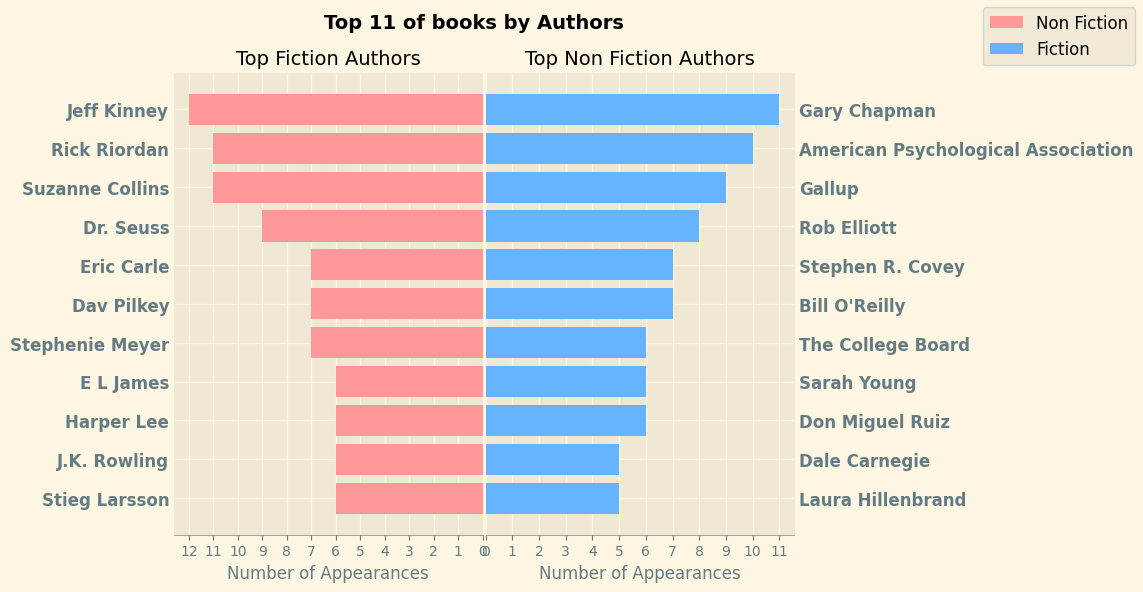

In [ ]:
import numpy as np
st_nf_authors = df.groupby(['author','genre']).agg({'name':'count'}).unstack()['name','Non Fiction'].sort_values(ascending=False)[:11]
st_f_authors = df.groupby(['author','genre']).agg({'name':'count'}).unstack()['name','Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig,ax = plt.subplots(1,2,figsize=(8,8))

    colors = ['#ff9999','#66b3ff']

    ax[0].barh(y=st_f_authors.index,width=st_f_authors.values,color=colors[0])
    ax[0].invert_xaxis()
    ax[0].invert_yaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(st_f_authors.values)+1))
    ax[0].set_yticklabels(st_f_authors.index,fontsize=12,fontweight='semibold')
    ax[0].set_xlabel('Number of Appearances',fontsize=12)
    ax[0].set_title('Top Fiction Authors',fontsize = 14)

    ax[1].barh(y=st_nf_authors.index,width=st_nf_authors.values,color=colors[1])
    ax[1].invert_yaxis()
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(st_nf_authors)+1))
    ax[1].set_yticklabels(st_nf_authors.index,fontsize=12,fontweight='semibold')
    ax[1].set_xlabel('Number of Appearances',fontsize=12)
    ax[1].set_title('Top Non Fiction Authors',fontsize = 14)

    fig.legend(['Non Fiction','Fiction'],fontsize=12)

    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['top'].set_visible(False)

    plt.subplots_adjust(wspace=0.01)
    for a in ax:
        a.spines['bottom'].set_linewidth(0.5)
        a.spines['bottom'].set_color('gray')
        a.tick_params(axis='y',which='both',length=0)
    fig.suptitle("Top 11 of books by Authors",fontsize=14, fontweight="semibold")
    plt.show()


### Book Count in Each Genre

Text(0.5, 1.0, 'Number of books released fiction v/s non-fiction across years')

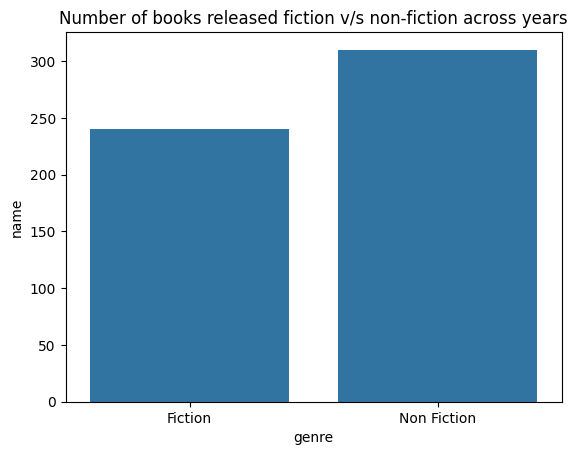

In [ ]:
df_genre_books=df.groupby(by='genre')['name'].count().reset_index()

sns.barplot(x=df_genre_books['genre'],y=df_genre_books['name'])
plt.title("Number of books released fiction v/s non-fiction across years")

### Average Price of Book

In [ ]:
df_avg_books_price=df['price'].mean()
df_avg_books_price

np.float64(13.1)

### Yearly Trends in Ratings/Reviews

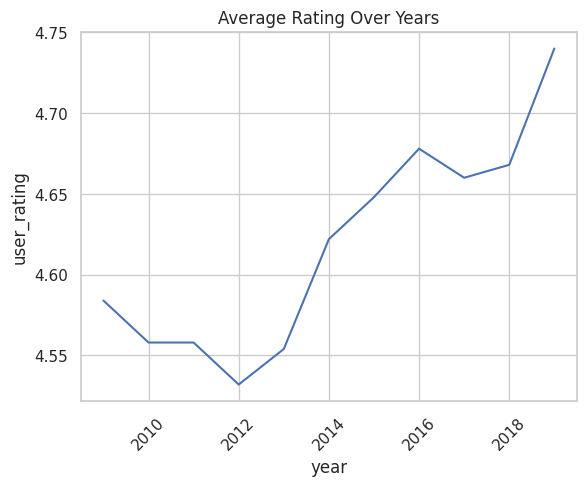

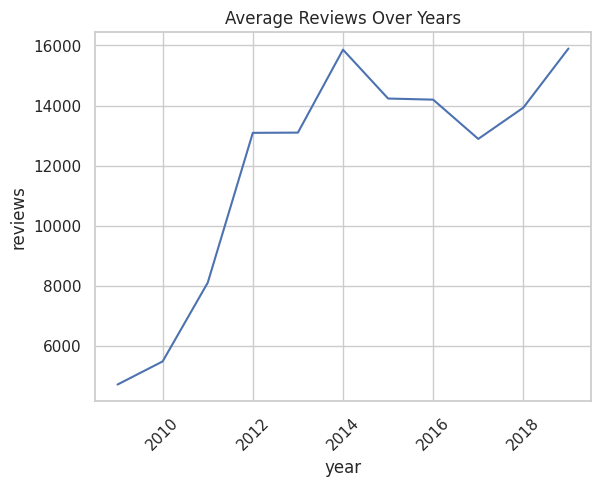

In [ ]:
sns.lineplot(data=df.groupby('year')['user_rating'].mean().reset_index(), x='year', y='user_rating')
plt.title('Average Rating Over Years')
plt.xticks(rotation=45)
plt.show()

sns.lineplot(data=df.groupby('year')['reviews'].mean().reset_index(), x='year', y='reviews')
plt.title('Average Reviews Over Years')
plt.xticks(rotation=45)
plt.show()


### Relationship between price and reviews

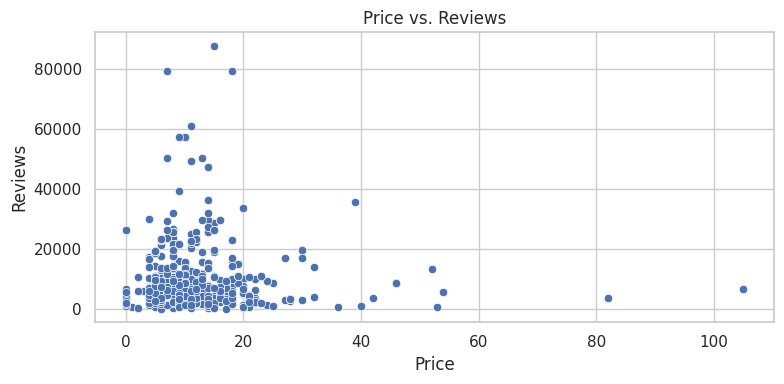

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='price', y='reviews')
plt.title("Price vs. Reviews")
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

**What Is a Correlation Matrix?**


*A correlation matrix shows how strongly each numeric variable is related to others. It returns values between:*

* +1.0: Strong positive correlation (variables increase together)

* 0.0: No linear relationship

* -1.0: Strong negative correlation (one increases, the other decreases)


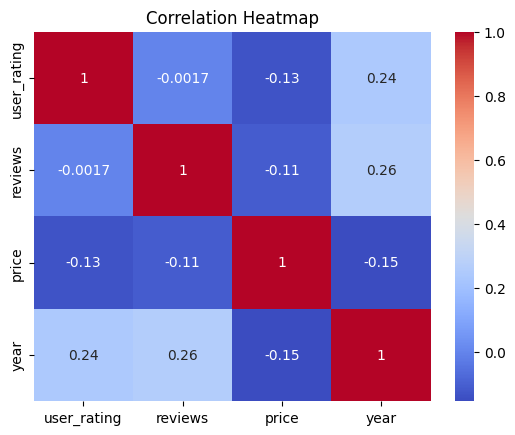

In [ ]:
sns.heatmap(df[['user_rating', 'reviews', 'price', 'year']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Here from this correlation matrix its clear that

*  user_rating vs reviews -0.00 no correlation ( no effect )
* user_rating vs price -0.13 slight negative correlation ( higher priced books may hav less rating)
* user_rating vs year 0.24 weak positive ( recent books with higher rating )
* reviews vs price -0.11 slight negative ( very weak affect of price on review count )
* review vs year 0.26 weak positive (recent books getting more review)
* price vs year -0.15 slight negative ( almost no effect , price may be dropping per year )

### Top 10 Books By Year

In [ ]:
def top_of_year(x):
  df_y = df[df['year'] == x].sort_values(by='reviews', ascending=False)
  print(df_y[['name', 'author', 'reviews']].head(10))

top_of_year(2018)

                                                  name           author  \
32                                            Becoming   Michelle Obama   
490                                   The Wonky Donkey      Craig Smith   
97                                  Educated: A Memoir    Tara Westover   
465  The Subtle Art of Not Giving a F*ck: A Counter...      Mark Manson   
220                            Little Fires Everywhere       Celeste Ng   
328  The 5 Love Languages: The Secret to Love that ...     Gary Chapman   
170              How to Win Friends & Influence People    Dale Carnegie   
379  The Four Agreements: A Practical Guide to Pers...  Don Miguel Ruiz   
293  School Zone - Big Preschool Workbook - Ages 4 ...      School Zone   
287                          Ready Player One: A Novel     Ernest Cline   

     reviews  
32     61133  
490    30183  
97     28729  
465    26490  
220    25706  
328    25554  
170    25001  
379    23308  
293    23047  
287    22536  


In [ ]:
df_top_rated=df.groupby(by='name')['user_rating'].mean().sort_values(ascending=False).reset_index()
df_top_rated

,name,user_rating
0,Wrecking Ball (Diary of a Wimpy Kid Book 14),4.9
1,"Brown Bear, Brown Bear, What Do You See?",4.9
2,Dog Man: Lord of the Fleas: From the Creator o...,4.9
3,The Wonderful Things You Will Be,4.9
4,The Very Hungry Caterpillar,4.9
...,...,...
346,Allegiant,3.9
347,The Goldfinch: A Novel (Pulitzer Prize for Fic...,3.9
348,Fifty Shades of Grey: Book One of the Fifty Sh...,3.8
349,Go Set a Watchman: A Novel,3.6


# If Needed

---



In [ ]:
ndf = df.drop_duplicates(subset=['name', 'author'])
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 0 to 546
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         351 non-null    object 
 1   author       351 non-null    object 
 2   user_rating  351 non-null    float64
 3   reviews      351 non-null    int64  
 4   price        351 non-null    int64  
 5   year         351 non-null    int64  
 6   genre        351 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.9+ KB


In [ ]:
ndf = df.copy()
ndf.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# **Day 4**

## 5. What is a Proxy?

---


**A proxy is an indirect measure or substitute for something we can’t directly observe.**

For example:

* *Sales Proxy = Number of reviews*

(Because high review count often means high sales volume)

* *Inventory Value Proxy = Price × Review Count*

(Rough estimate of total value based on popularity and price)

### **Step 1: Create Proxy Columns**

---

In [ ]:
# Assume: For every 100 purchases, ~1 person leaves a review (industry average review rate ≈ 1%)
ndf['estimated_sales'] = ndf['reviews'] * 10

ndf['estimated_revenue'] = ndf['estimated_sales'] * df['price']

In [ ]:
ndf.shape[0]

550

### **Step 2: Summary Statistics**

---



In [ ]:
summary_stats = ndf.describe()
print(summary_stats)

       user_rating       reviews       price         year  estimated_sales  \
count   550.000000    550.000000  550.000000   550.000000       550.000000   
mean      4.618364  11953.281818   13.100000  2014.000000    119532.818182   
std       0.226980  11731.132017   10.842262     3.165156    117311.320174   
min       3.300000     37.000000    0.000000  2009.000000       370.000000   
25%       4.500000   4058.000000    7.000000  2011.000000     40580.000000   
50%       4.700000   8580.000000   11.000000  2014.000000     85800.000000   
75%       4.800000  17253.250000   16.000000  2017.000000    172532.500000   
max       4.900000  87841.000000  105.000000  2019.000000    878410.000000   

       estimated_revenue  
count       5.500000e+02  
mean        1.427262e+06  
std         1.723369e+06  
min         0.000000e+00  
25%         4.418500e+05  
50%         8.578400e+05  
75%         1.746720e+06  
max         1.430028e+07  


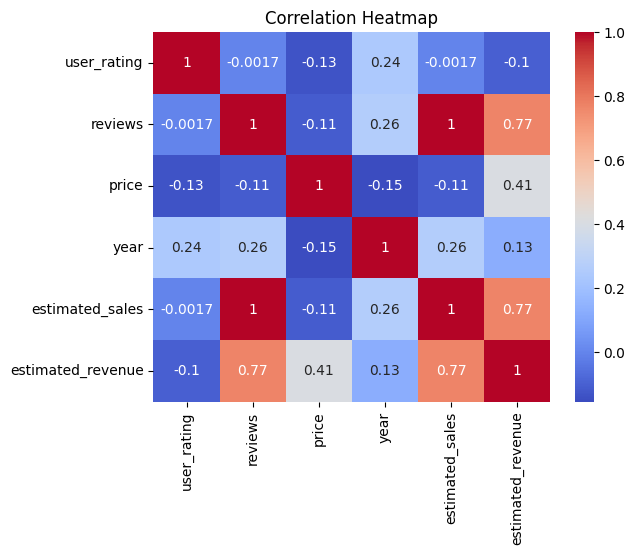

In [66]:
correlation_matrix = ndf[['user_rating', 'reviews', 'price','year', 'estimated_sales', 'estimated_revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Step 3: Top Performing Books**

---



In [ ]:
top_revenue_books = ndf.sort_values(by='estimated_revenue', ascending=False).head(5)[['name', 'price',  'estimated_sales', 'estimated_revenue','year']]
print(top_revenue_books)


                                                  name  price  \
382                              The Girl on the Train     18   
338                                      The Alchemist     39   
534                            Where the Crawdads Sing     15   
70   Diagnostic and Statistical Manual of Mental Di...    105   
69   Diagnostic and Statistical Manual of Mental Di...    105   

     estimated_sales  estimated_revenue  year  
382           794460           14300280  2015  
338           357990           13961610  2014  
534           878410           13176150  2019  
70             66790            7012950  2014  
69             66790            7012950  2013  


### **Step 4: Visualizations**

---



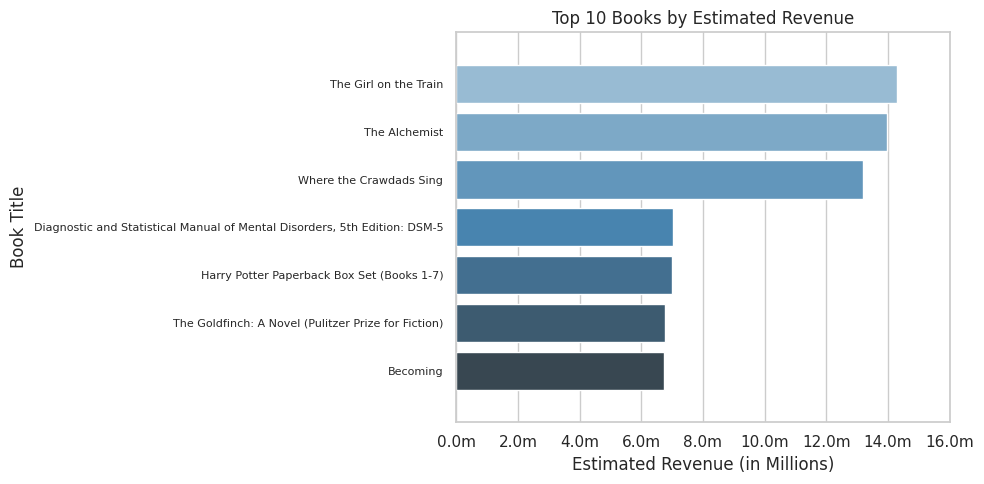

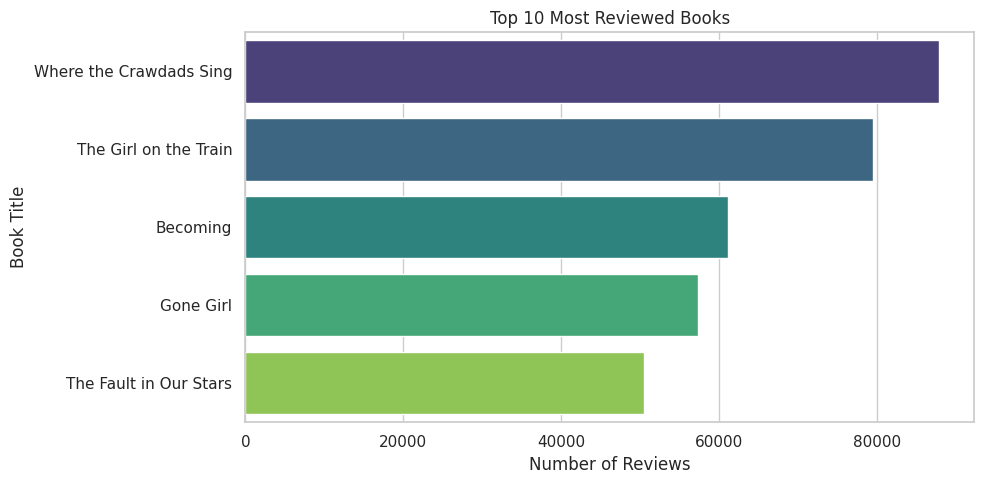

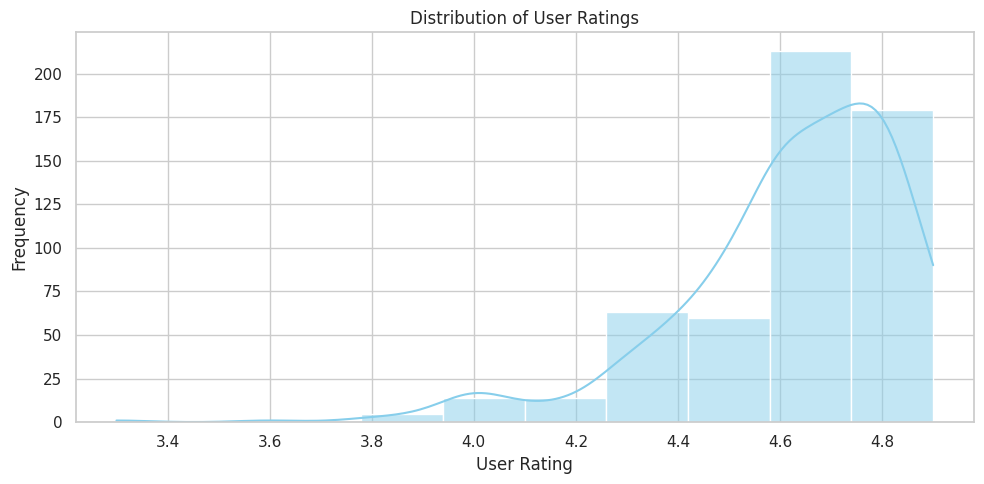

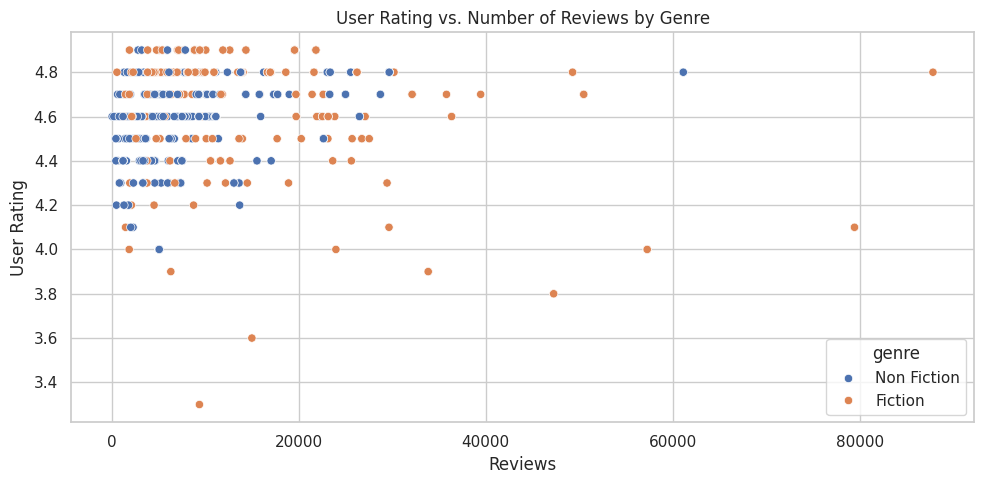

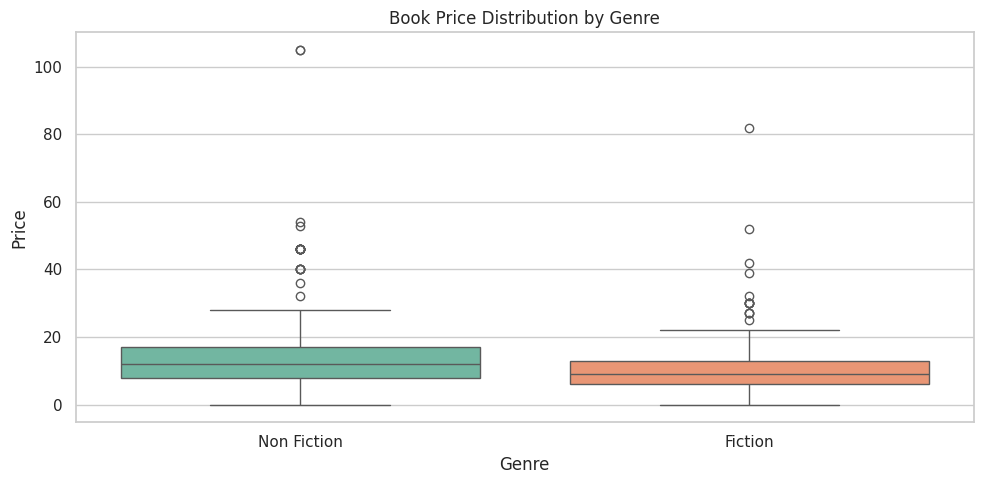

In [ ]:
sns.set(style="whitegrid")

# Plot 1: Top 10 Books by Estimated Revenue
top10_revenue = ndf.sort_values(by='estimated_revenue', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=top10_revenue, y='name', x='estimated_revenue', hue='name',legend=False, palette='Blues_d')
plt.title("Top 10 Books by Estimated Revenue")
plt.xlabel("Estimated Revenue (in Millions)")
plt.ylabel("Book Title")
plt.margins(y=.1)
locs, labels = plt.xticks()
new_labels = [f'{loc/1000000:.1f}m' for loc in locs]
plt.xticks(locs, new_labels)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()
print('\n')


# Plot 2:  Top 10 Most reviewed Books
plt.figure(figsize=(10, 5))
sns.barplot(data=top_books, x='reviews', y='name',hue='name',legend=False, palette='viridis')
plt.title('Top 10 Most Reviewed Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()
print('\n')


# Plot 3: Distribution of User Ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['user_rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of User Ratings")
plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
print('\n')

# Plot 4: Rating vs. Reviews (by Genre)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='reviews', y='user_rating', hue='genre')
plt.title("User Rating vs. Number of Reviews by Genre")
plt.xlabel("Reviews")
plt.ylabel("User Rating")
plt.tight_layout()
plt.show()
print('\n')

# Plot 5: Genre vs. Average Price
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='genre', y='price',hue= 'genre', palette='Set2')
plt.title("Book Price Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [ ]:
# file_path = os.path.join(folder_path, 'cleaned_data.csv')
# cdf.to_csv(file_path, index=False)

# Day 5 (Optional)

### Try - 1 : Predicting Sales

---



R² Score: 0.1472
RMSE: 136565.13


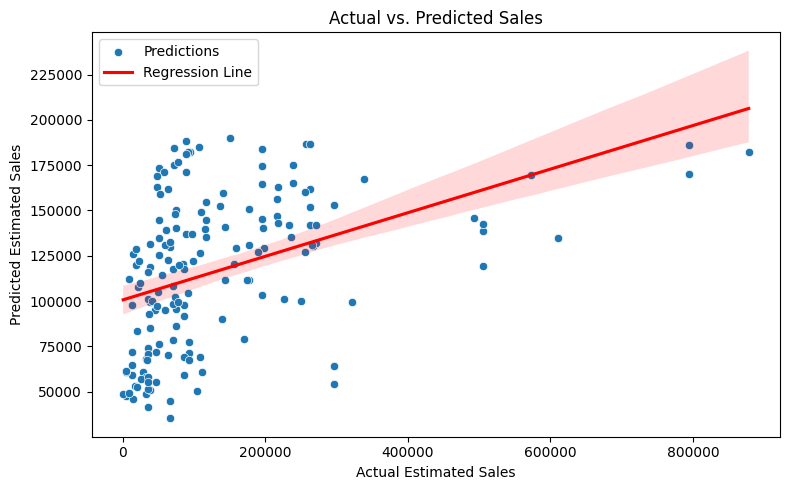

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ndf['genre_encoded'] = ndf['genre'].apply(lambda x: 1 if x == 'Fiction' else 0)

# Features and target
X = ndf[['price', 'user_rating', 'year', 'genre_encoded']]
y = ndf['estimated_sales']

# 1. Scale the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 3. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))

# 6. Plot prediction vs actual with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, label='Predictions')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Regression Line')
plt.xlabel("Actual Estimated Sales")
plt.ylabel("Predicted Estimated Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()
plt.tight_layout()
plt.show()


## Try - 2 : Predicting Price

R² Score: 0.0406
RMSE: 12.01
MAE: 6.78
MAPE: inf %


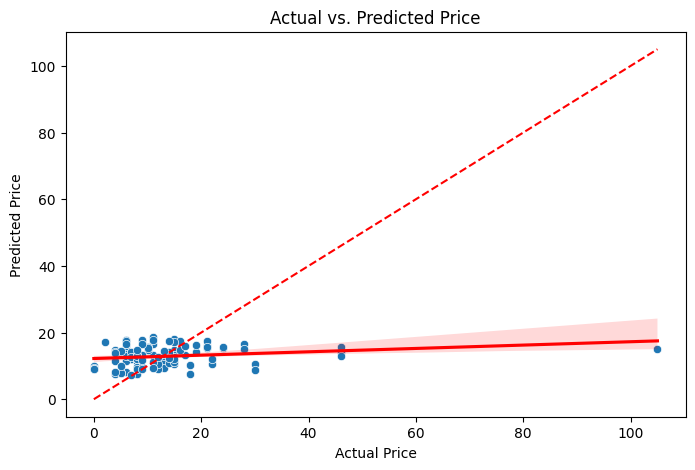

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ndf['genre_encoded'] = ndf['genre'].apply(lambda x: 1 if x == 'Fiction' else 0)

# === Step 1: Define features and target ===
X = ndf[['user_rating', 'reviews', 'year', 'genre_encoded']]
y = ndf['price']

# === Step 2: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Step 3: Train Linear Regression model ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Step 4: Make predictions ===
y_pred = model.predict(X_test)

# === Step 5: Evaluation ===
r2 = r2_score(y_test, y_pred)


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)


print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))


# === Step 6: Visualization ===
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Regression Line')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()


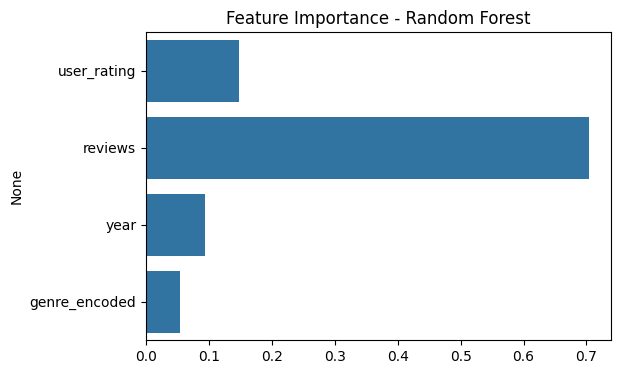

In [89]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance plot
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()
